<a href="https://colab.research.google.com/github/Spatino87/Predictive_Analytics/blob/main/Diamond_Dataset_Analysis_12_15_23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Task 1: Define the Problem

In [ ]:
# In this notebook, we are going to analyze diamond data and make predictions based on characteristics.

#Task 2a: Install the Needed Libraries

In [ ]:
# N/A

#Task 2b: Import the Needed Libraries

In [ ]:
# pandas provides data analysis tools
import pandas as pd
# numpy is the fundamental package for scientific computing in Python
import numpy as np
# matplotlib.pylot opens figures on your screen, GIU manager
# pyplot intended for interactive plots and simple cases of plot generation
import matplotlib.pyplot as plt
# seaborn is a python data visualization library based on matplotlib
import seaborn as sns
import plotly
# cufflinks is used to make prettier graphs
# Interaction with your charts
import cufflinks as cf

from sklearn.model_selection import train_test_split # Standard
from sklearn.linear_model import LinearRegression # For Linear Regression ML
from sklearn.linear_model import LogisticRegression # For Logistic Regression ML
from sklearn.tree import DecisionTreeClassifier # For Decision Tree ML
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier # For Random Forest ML
from sklearn.ensemble import RandomForestRegressor #
from xgboost import XGBRegressor # attempts to classify the order of importance of each feature
from sklearn.metrics import classification_report, confusion_matrix # Classification Report and Conusion Matrix

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, accuracy_score
from math import sqrt
from sklearn import metrics

from IPython.display import Image # allows to paint picture
from six import StringIO # allows to pin picture
from sklearn.tree import export_graphviz # export jpeg file etc.
import pydot

import pickle

# set aspects of the visual theme for all matplotlib and seaborn plots
sns.set()

#Task 3: Load the Data

In [ ]:
# Load in csv file from github repo
df = pd.read_csv('https://raw.githubusercontent.com/Spatino87/ML_Data/main/diamonds.csv')

#Task 4: Perform Data Exploratory Analysis (EDA)

##Show the data

In [ ]:
# Show the first 10 rows of the df
df.head(10)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


In [ ]:
# Show last 10 rows of df
df.tail(10)

,carat,cut,color,clarity,depth,table,price,x,y,z
53930,0.71,Premium,E,SI1,60.5,55.0,2756,5.79,5.74,3.49
53931,0.71,Premium,F,SI1,59.8,62.0,2756,5.74,5.73,3.43
53932,0.70,Very Good,E,VS2,60.5,59.0,2757,5.71,5.76,3.47
53933,0.70,Very Good,E,VS2,61.2,59.0,2757,5.69,5.72,3.49
53934,0.72,Premium,D,SI1,62.7,59.0,2757,5.69,5.73,3.58
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64


In [ ]:
# Show 10 random rows of df
df.sample(10)

,carat,cut,color,clarity,depth,table,price,x,y,z
45290,0.51,Ideal,E,VS2,61.5,55.0,1662,5.23,5.14,3.19
39096,0.41,Ideal,I,VVS2,61.7,56.0,1061,4.80,4.77,2.95
4600,1.01,Premium,J,SI2,61.9,59.0,3658,6.38,6.34,3.94
18485,1.31,Premium,H,SI1,62.4,58.0,7527,7.02,6.96,4.36
18209,1.03,Ideal,G,VS1,61.2,57.0,7391,6.50,6.54,3.99
41104,0.46,Very Good,E,VS2,62.1,57.0,1194,4.89,4.93,3.05
1967,0.73,Ideal,G,SI1,61.7,57.0,3089,5.78,5.81,3.57
42692,0.54,Good,H,VS2,63.2,55.0,1338,5.20,5.24,3.30
6512,1.44,Premium,J,SI2,58.2,58.0,4064,7.39,7.35,4.29
2974,0.91,Ideal,J,VS2,61.9,58.0,3299,6.18,6.22,3.84


In [ ]:
# Show the columns of the df
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [ ]:
# Show smallest carat size
df['carat'].min()

0.2

In [ ]:
# Show largest carat size
df['carat'].max()

5.01

##Get Data Info

In [ ]:
# df has 54K rows and 10 columns
df.shape

(53940, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [ ]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


##Find Missing Values

In [ ]:
# check to see if any columns contain null values
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [ ]:
# check to see if any columns contain na values
df.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [ ]:
# Tells us if the df contains any null values
df.isnull().values.any()

False

<Axes: >

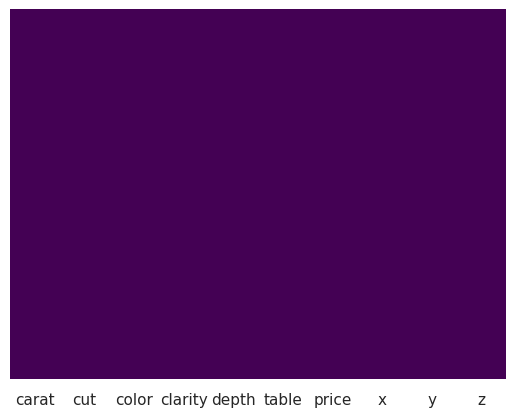

In [ ]:
# viz of any null values in df
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

#Task 5: Perform Data Cleaning

In [ ]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


<Axes: xlabel='clarity', ylabel='count'>

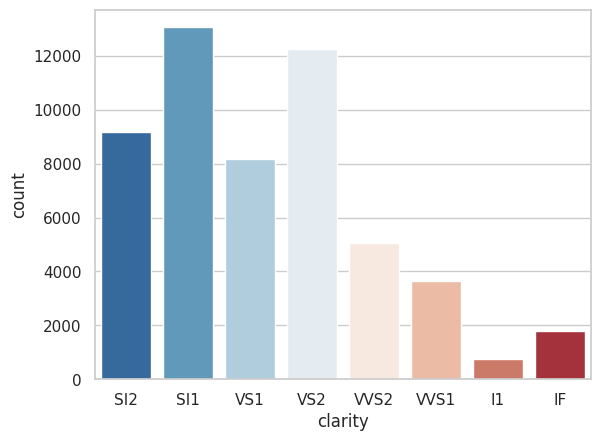

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='clarity', data=df, palette='RdBu_r')

<Figure size 1700x1200 with 0 Axes>

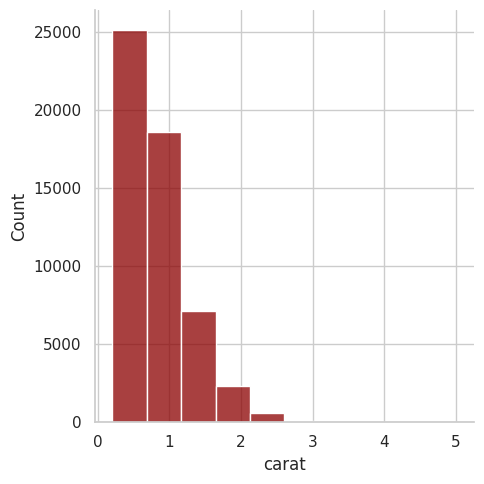

In [ ]:
# carat size across all diamonds in a histogram
plt.figure(figsize=(17, 12))
sns.displot(df['carat'].dropna(), kde=False, color='darkred', bins=10);

<Axes: xlabel='cut', ylabel='count'>

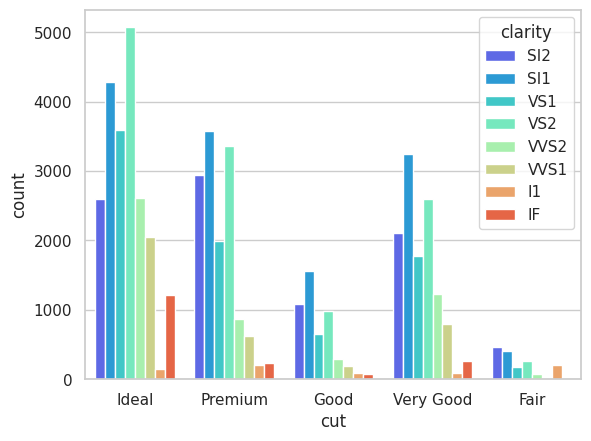

In [ ]:
sns.countplot(x='cut', hue='clarity',data=df, palette='rainbow')

In [ ]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
# convert price column to float64 type
df['price'] = df['price'].astype('float64')

In [ ]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326.0,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326.0,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327.0,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334.0,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335.0,4.34,4.35,2.75


In [ ]:
# changing string data to where a machine learning model can deal with it
Cut = pd.get_dummies(df['cut'], drop_first=True)
Color = pd.get_dummies(df['color'], drop_first=True)
Clarity = pd.get_dummies(df['clarity'], drop_first=True)

In [ ]:
# dropping the original string columns
df.drop(['cut','color','clarity'], axis=1, inplace=True)

In [ ]:
# joining df with new created binary columns
df = pd.concat([df, Cut, Color, Clarity], axis=1)

In [ ]:
df.head()

,carat,depth,table,price,x,y,z,Good,Ideal,Premium,...,H,I,J,IF,SI1,SI2,VS1,VS2,VVS1,VVS2
0,0.23,61.5,55.0,326.0,3.95,3.98,2.43,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326.0,3.89,3.84,2.31,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327.0,4.05,4.07,2.31,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334.0,4.20,4.23,2.63,0,0,1,...,0,1,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335.0,4.34,4.35,2.75,1,0,0,...,0,0,1,0,0,1,0,0,0,0


In [ ]:
# Create df will only necessary columns for ml algorithms
df = df[['price','carat','x','y','z', 'Premium', 'VS1','E']]

In [ ]:
df.head()

,price,carat,x,y,z,Premium,VS1,E
0,326.0,0.23,3.95,3.98,2.43,0,0,1
1,326.0,0.21,3.89,3.84,2.31,1,0,1
2,327.0,0.23,4.05,4.07,2.31,0,1,1
3,334.0,0.29,4.20,4.23,2.63,1,0,0
4,335.0,0.31,4.34,4.35,2.75,0,0,0


#Task 6: Visualize Cleaned up Dataset

In [ ]:
# creating variables for scatter plot
carat = df['carat']
price = df['price']

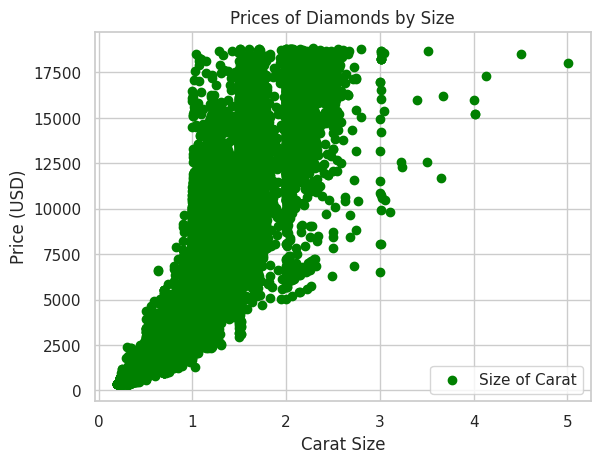

In [ ]:
plt.scatter(carat,price, color="green", label="Size of Carat")
plt.title("Prices of Diamonds by Size")
plt.xlabel("Carat Size")
plt.ylabel("Price (USD)")
plt.legend()
plt.show();

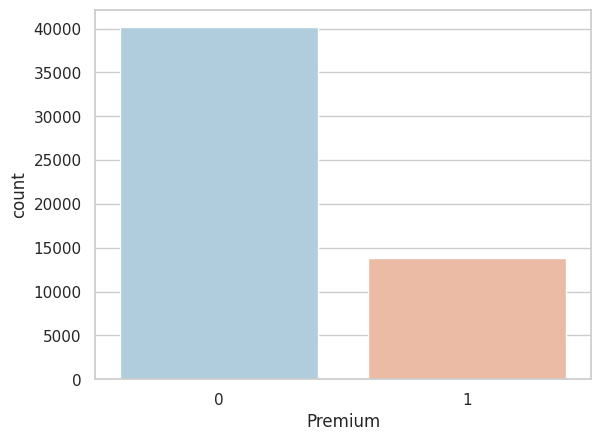

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='Premium', data=df, palette='RdBu_r');

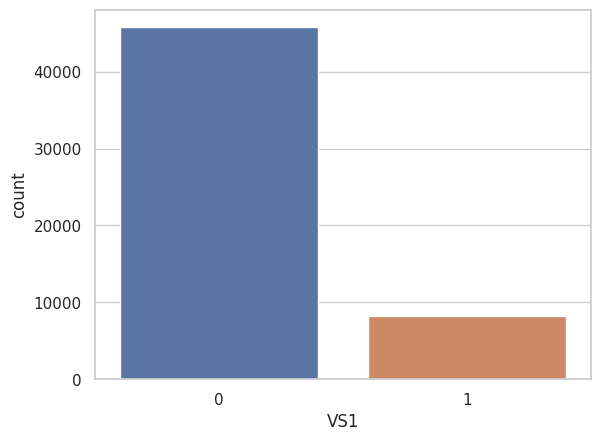

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='VS1', data=df, palette='deep');

#Task 7: Conceptualize the problem

In [ ]:
# After reviewing the data, will focus on predicting the price of diamond based on carat size and dimensions

In [ ]:
# Create x and y values.
# x contains columns carat, x, y, z (diamond demensions)
x = df.iloc[:, 1:].values
# y contains the target
y = df['price'].values

In [ ]:
# check data type of x
type(x)

numpy.ndarray

In [ ]:
# check data type of y
type(y)

numpy.ndarray

In [ ]:
x

array([[0.23, 3.95, 3.98, ..., 0.  , 0.  , 1.  ],
       [0.21, 3.89, 3.84, ..., 1.  , 0.  , 1.  ],
       [0.23, 4.05, 4.07, ..., 0.  , 1.  , 1.  ],
       ...,
       [0.7 , 5.66, 5.68, ..., 0.  , 0.  , 0.  ],
       [0.86, 6.15, 6.12, ..., 1.  , 0.  , 0.  ],
       [0.75, 5.83, 5.87, ..., 0.  , 0.  , 0.  ]])

In [ ]:
y

array([ 326.,  326.,  327., ..., 2757., 2757., 2757.])

#Task 8: Perform Data-Split

In [ ]:
# split the data inot train and test sets
# tell the machine take 25% and make it into test
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.25, random_state = 100)

In [ ]:
print(f'The shape of the data is: \nx_train: \t{x_train.shape} \nx_test: \t{x_test.shape} \ny_train: \t{y_train.shape} \ny_test: \t{y_test.shape}')

The shape of the data is: 
x_train: 	(40455, 7) 
x_test: 	(13485, 7) 
y_train: 	(40455,) 
y_test: 	(13485,)


#Task 9: Choose the ML Method to follow

In [ ]:
LinearRegression_model = LinearRegression()
DecisionTree_model = DecisionTreeRegressor()
RandomForest_model = RandomForestRegressor()
XGBRegressor_model = XGBRegressor()

#Task 10: Train the ML Model

In [ ]:
models = [LinearRegression_model, DecisionTree_model, RandomForest_model, XGBRegressor_model]
for model in models:
    model.fit(x_train, y_train)
    print(f'{model} is trained!')

LinearRegression() is trained!
DecisionTreeRegressor() is trained!
RandomForestRegressor() is trained!
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...) is trained!


#Task 11: Test the Model

In [ ]:
accuracy_LinearRegression = LinearRegression_model.score(x_test, y_test)
accuracy_DecisionTree = DecisionTree_model.score(x_test, y_test)
accuracy_RandomForest = RandomForest_model.score(x_test, y_test)
accuracy_XGBoost = XGBRegressor_model.score(x_test, y_test)

In [ ]:
models = {'LinearRegression_model': accuracy_LinearRegression, 'DecisionTree_model': accuracy_DecisionTree, 'RandomForest_model': accuracy_RandomForest,
          'XGBRegressor_model': accuracy_XGBoost}
for model, score in models.items():
    print(f'The accuracy score for the {model} is {round(score*100, 2)}%')

The accuracy score for the LinearRegression_model is 84.94%
The accuracy score for the DecisionTree_model is 78.57%
The accuracy score for the RandomForest_model is 87.83%
The accuracy score for the XGBRegressor_model is 88.76%


In [ ]:
df.head()

,price,carat,x,y,z,Premium,VS1,E
0,326.0,0.23,3.95,3.98,2.43,0,0,1
1,326.0,0.21,3.89,3.84,2.31,1,0,1
2,327.0,0.23,4.05,4.07,2.31,0,1,1
3,334.0,0.29,4.20,4.23,2.63,1,0,0
4,335.0,0.31,4.34,4.35,2.75,0,0,0


In [ ]:
df.columns

Index(['price', 'carat', 'x', 'y', 'z', 'Premium', 'VS1', 'E'], dtype='object')

In [ ]:
test_x = np.zeros((1,7))
test_x

array([[0., 0., 0., 0., 0., 0., 0.]])

In [ ]:
test_x = np.zeros((1, 7))

test_x[0, 0] = 0.21 # carat
test_x[0, 1] = 3.89 # x dimension
test_x[0, 2] = 3.84 # y dimension
test_x[0, 3] = 2.31 # z dimension
test_x[0, 4] = 1 # Premium
test_x[0, 5] = 0 # VS1
test_x[0, 6] = 1 # E - Color

test_x

array([[0.21, 3.89, 3.84, 2.31, 1.  , 0.  , 1.  ]])

In [ ]:
prediction = DecisionTree_model.predict(test_x)
round(float(prediction[0]), 2)

326.0

In [ ]:
models = [LinearRegression_model, DecisionTree_model, RandomForest_model, XGBRegressor_model]

In [ ]:
for model in models:
    prediction = model.predict(test_x)
    print(f'The model {model} predicts a price of {round(float(prediction[0]), 2)}')

The model LinearRegression() predicts a price of 96.82
The model DecisionTreeRegressor() predicts a price of 326.0
The model RandomForestRegressor() predicts a price of 355.63
The model XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...) predicts a price of 412.12


### The Decision Tree model predicted a price of 326.0 which is the exact same price in the dataframe with the inputted characteristic, even though the model only had a 79% accuracy which was the least accuracy compared to all the models.


In [ ]:
mdl_file = '/content/drive/MyDrive/Classroom/Data Science: Predictive Analytics Cohort 5/Projects/Diamond Dataset Analysis/'

In [ ]:
with open('mdl_file', 'wb') as file:
    model = pickle.dump(DecisionTree_model, file)

In [ ]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [ ]:
model = Sequential()
model.add(Dense(25, input_dim = x.shape[1], activation = 'relu'))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(1))

In [ ]:
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [ ]:
monitor = EarlyStopping(monitor = 'val_loss', min_delta = 1e-3, patience = 5, verbose = 1, mode = 'auto', restore_best_weights = True)

In [ ]:
model.fit(x_train, y_train, validation_data = (x_test, y_test), callbacks = [monitor], verbose = 2, epochs = 1000)

Epoch 1/1000
1265/1265 - 6s - loss: 23507016.0000 - val_loss: 11542965.0000 - 6s/epoch - 5ms/step
Epoch 2/1000
1265/1265 - 4s - loss: 10623051.0000 - val_loss: 10201437.0000 - 4s/epoch - 3ms/step
Epoch 3/1000
1265/1265 - 4s - loss: 9937419.0000 - val_loss: 9500020.0000 - 4s/epoch - 3ms/step
Epoch 4/1000
1265/1265 - 4s - loss: 9142537.0000 - val_loss: 8608699.0000 - 4s/epoch - 3ms/step
Epoch 5/1000
1265/1265 - 5s - loss: 8137944.0000 - val_loss: 7500464.0000 - 5s/epoch - 4ms/step
Epoch 6/1000
1265/1265 - 4s - loss: 6917337.5000 - val_loss: 6207497.5000 - 4s/epoch - 3ms/step
Epoch 7/1000
1265/1265 - 4s - loss: 5556588.0000 - val_loss: 4829824.5000 - 4s/epoch - 3ms/step
Epoch 8/1000
1265/1265 - 4s - loss: 4234349.5000 - val_loss: 3630673.7500 - 4s/epoch - 3ms/step
Epoch 9/1000
1265/1265 - 4s - loss: 3215742.5000 - val_loss: 2853958.5000 - 4s/epoch - 3ms/step
Epoch 10/1000
1265/1265 - 4s - loss: 2665515.5000 - val_loss: 2531720.0000 - 4s/epoch - 3ms/step
Epoch 11/1000
1265/1265 - 4s - loss

In [ ]:
prediction = model.predict(x_test)
score = np.sqrt(metrics.mean_squared_error(prediction, y_test))
print(f'After training the price is: {score}')

422/422 [==============================] - 1s 2ms/step
After training the price is: 1459.8649466008355


In [ ]:
col = [x for x in df.columns if x not in ('price')]

# Normal loop way
print('{')
for i, name in enumerate(col):
    print(f'"{name}":{{"min":{df[name].min()}, "max":{df[name].max()}}}{"," if i < (len(col)-1) else ""}')
print('}')

{
"carat":{"min":0.2, "max":5.01},
"x":{"min":0.0, "max":10.74},
"y":{"min":0.0, "max":58.9},
"z":{"min":0.0, "max":31.8},
"Premium":{"min":0, "max":1},
"VS1":{"min":0, "max":1},
"E":{"min":0, "max":1}
}


In [ ]:
model.save('diamond_model.keras')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 25)                200       
                                                                 
 dense_1 (Dense)             (None, 10)                260       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 471 (1.84 KB)
Trainable params: 471 (1.84 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


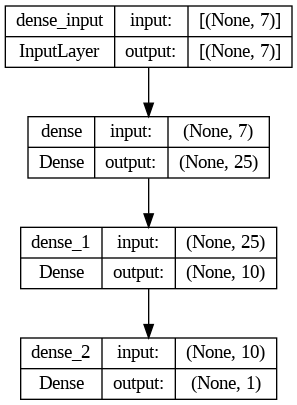

In [ ]:
from keras.utils import plot_model
plot_model(model, show_shapes=True)

In [ ]:
test_x = np.zeros((1, 7))

test_x[0, 0] = 0.21 # carat
test_x[0, 1] = 3.89 # x dimension
test_x[0, 2] = 3.84 # y dimension
test_x[0, 3] = 2.31 # z dimension
test_x[0, 4] = 1 # Premium
test_x[0, 5] = 0 # VS1
test_x[0, 6] = 1 # E - Color

test_x

array([[0.21, 3.89, 3.84, 2.31, 1.  , 0.  , 1.  ]])

In [ ]:
prediction = model.predict(test_x)
round(float(prediction[0]), 2)

1/1 [==============================] - 0s 43ms/step


64.21

####Decision trees can capture nonlinear relationships between predictors (such as carat size and dimensions) and the target variable (diamond price). They're effective at accommodating complex interactions between features, which might be present in diamond pricing where relationships might not follow a simple linear pattern.

